In [ ]:
#objective: Estimate whether a person’s income exceeds $50K/year

In [2]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [11]:
#load data
df1 = pd.read_csv('../datasets/adult.data.csv', sep=",", header=None)
df2 = pd.read_csv('../datasets/adult.test.csv', sep=",", header=None)
df1.columns = ['age','workclass','fnlweight','education','education_num','marital_status','occupation',
'relationship','race','sex','capital_gain','capital_loss','hours_week','native_country','class']
df2.columns = df1.columns

In [16]:
print(df1.shape,df2.shape)

(32561, 15) (16281, 15)


In [12]:
df1_backup = df1
df2_backup = df2

In [13]:
df = pd.concat([df1,df2])

In [14]:
df.head()

,age,workclass,fnlweight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
df.shape

(48842, 15)

In [10]:
#remove bad data
#check for missing data
nan_rows = df.isnull().T.any().T.sum()
#drop missing data
df = df.dropna()
df.shape

(48842, 15)

In [17]:
#perform summary statistics
df.describe()

,age,fnlweight,education_num,capital_gain,capital_loss,hours_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


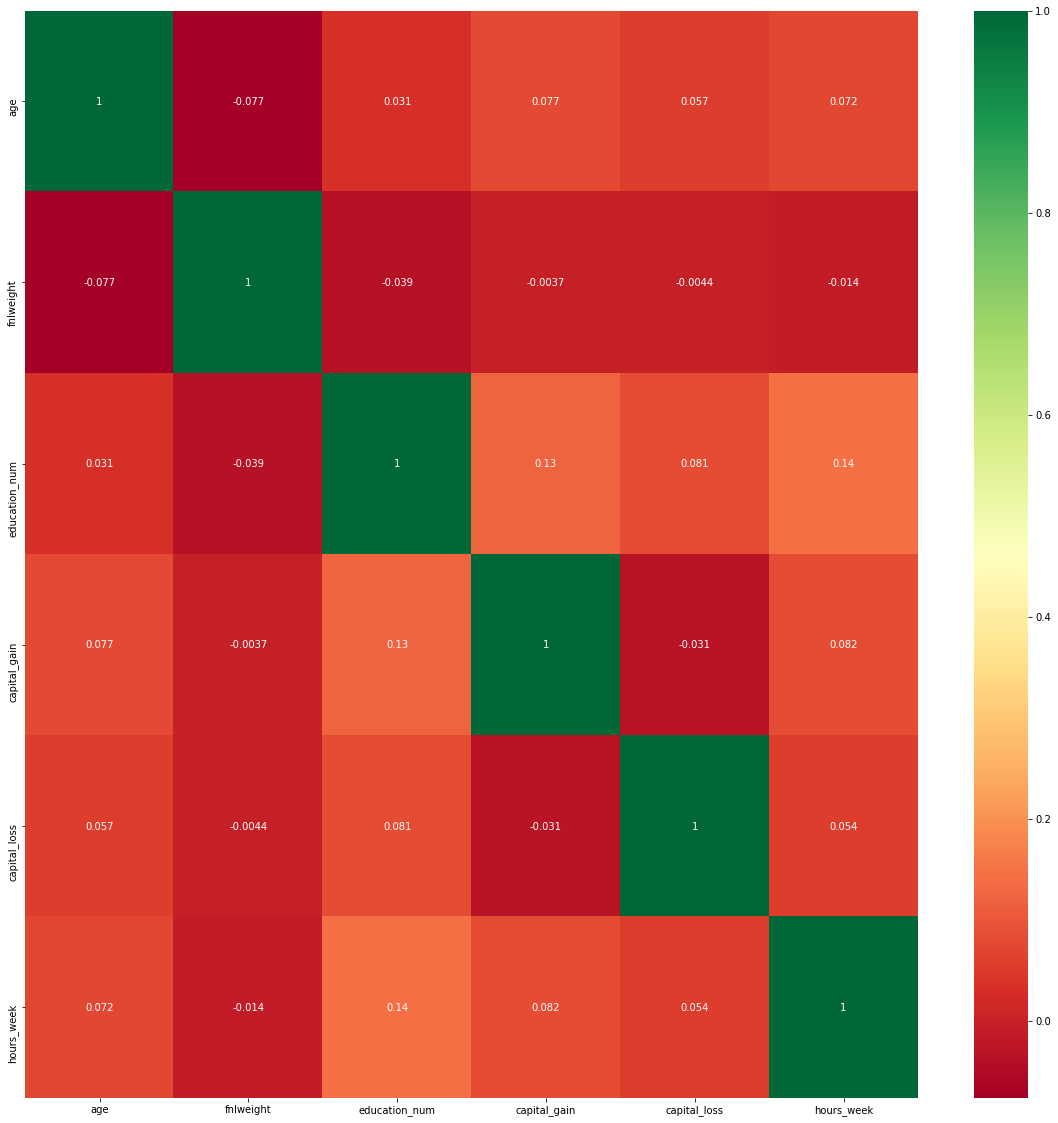

In [18]:
#correlation
x = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [ ]:
#['age','workclass','fnlweight','education','education_num','marital_status','occupation',
#'relationship','race','sex','capital_gain','capital_loss','hours_week','native_country','class']

df_cat = df[['workclass','education','marital_status','occupation',
'relationship','race','sex','native_country']]
df_cat2 = pd.get_dummies(df_cat, columns=['workclass','education','marital_status','occupation',
'relationship','race','sex','native_country'], drop_first=False)
df_cat2.reset_index(drop=True, inplace=True)